In [41]:
import requests
import lxml.html as lh
import pandas as pd
from lxml import etree
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
url = 'https://wheresthejump.com/full-movie-list/'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')

In [21]:
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Movie Name"
2:"Director"
3:"Year"
4:"Jump
Count"
5:"Jump Scare 
Rating"
6:"Netflix 
(US)"
7:"Imdb"


In [67]:
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=7:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df.columns = ['Movie Name', 'Director', 'Year', 'Jump Count', 'Jump Scare Rating',
       'Netflix (US)', 'Imdb']
df = df.astype({'Jump Scare Rating': 'float','Imdb':'float','Jump Count':'int','Year':'int'})
df.head()

,Movie Name,Director,Year,Jump Count,Jump Scare Rating,Netflix (US),Imdb
0,10 Cloverfield Lane,Dan Trachtenberg,2016,8,2.5,No,7.2
1,28 Days Later,Danny Boyle,2003,10,3.0,No,7.6
2,28 Weeks Later,Juan Carlos Fresnadillo,2007,17,3.5,No,7.0
3,30 Days of Night,David Slade,2007,9,2.5,No,6.6
4,31,Rob Zombie,2016,8,2.5,No,5.1


C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


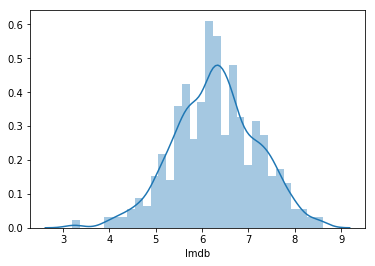

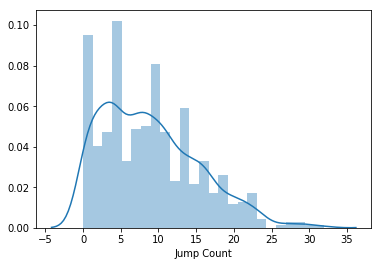

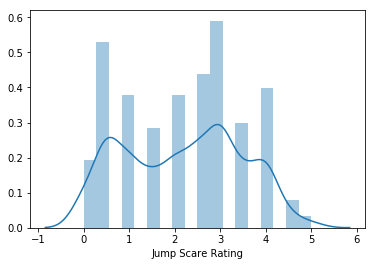

In [101]:
sns.distplot(df['Imdb'],label = 'Imdb')
plt.show()
sns.distplot(df['Jump Count'],label = 'Jump Count')
plt.show()
sns.distplot(df['Jump Scare Rating'],label = 'Imdb')
plt.show()



<Figure size 1440x720 with 0 Axes>

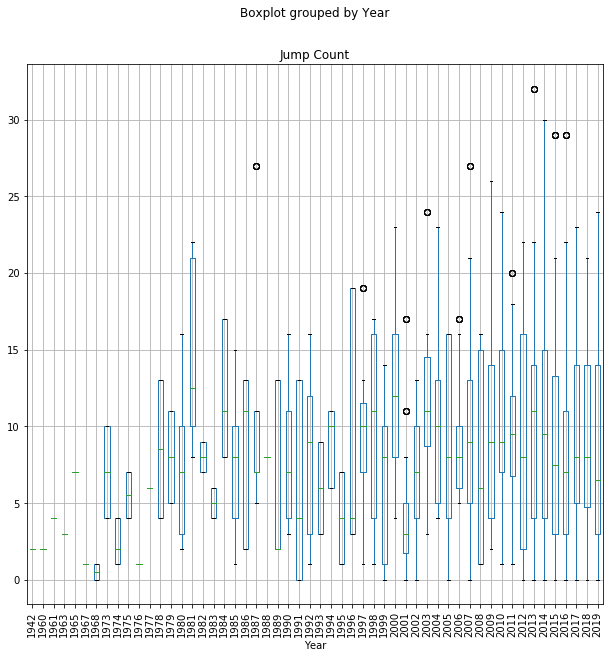

In [117]:
plt.figure(figsize=(20,10))
df.boxplot(column = 'Jump Count', by='Year',figsize = (10,10),rot = 90)
